In [0]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
champagne_df = pd.read_excel("champagne.xlsx")

In [125]:
champagne_df.head(20)

,Perrin Freres monthly champagne sales millions ’64-’72,Unnamed: 1,Unnamed: 2
0,Exported from datamarket.com,NaN,NaN
1,Date exported,2018-02-08 17:14:12.520000,NaN
2,View online,https://datamarket.com/data/set/22r5/perrin-fr...,NaN
3,License,Unknown; please assume a restricted license (a...,NaN
4,Provider,Time Series Data Library,NaN
5,Source URL,NaN,NaN
6,Units,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [0]:

# first 12 rows having Nan and appropriate data for our dataset .so we drop those
champagne_df = pd.read_excel("champagne.xlsx",skiprows =12 , names=['date','sales','x-feature'])

In [127]:
#look at the data once
champagne_df.head(20)

,date,sales,x-feature
0,1964-01-01,2815,NaN
1,1964-02-01,2672,NaN
2,1964-03-01,2755,NaN
3,1964-04-01,2721,NaN
4,1964-05-01,2946,NaN
5,1964-06-01,3036,NaN
6,1964-07-01,2282,NaN
7,1964-08-01,2212,NaN
8,1964-09-01,2922,NaN
9,1964-10-01,4301,NaN


In [128]:
champagne_df.dtypes

date         datetime64[ns]
sales                 int64
x-feature           float64
dtype: object

In [129]:
champagne_df.size

315

In [130]:
champagne_df.shape

(105, 3)

In [131]:
champagne_df.ndim

2

In [132]:
champagne_df.isnull()

,date,sales,x-feature
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
100,False,False,True
101,False,False,True
102,False,False,True
103,False,False,True


In [133]:
Isnull = champagne_df.isnull().sum()/len(champagne_df)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull
#x-feature column having 100% of nan values 

x-feature    100.0
dtype: float64

In [0]:
# drop x-feature column 
champagne_df = champagne_df.drop("x-feature", axis=1)

In [135]:
# look at data how it is after deleting the x-feature
champagne_df.head(20)

,date,sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946
5,1964-06-01,3036
6,1964-07-01,2282
7,1964-08-01,2212
8,1964-09-01,2922
9,1964-10-01,4301


In [136]:
champagne_df.dtypes

date     datetime64[ns]
sales             int64
dtype: object

In [0]:
#if already date column in datetime formate no need of write this
#champagne_df['date']=pd.to_datetime(champagne_df['date'])

In [0]:
#champagne_df.dtypes

In [0]:
#set date column as index column
champagne_df.set_index('date',inplace=True)


In [140]:
#lets check data 
champagne_df.head(10)

,sales
date,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
1964-06-01,3036
1964-07-01,2282
1964-08-01,2212
1964-09-01,2922


**Visualize the data**

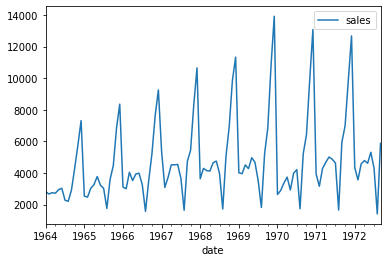

In [141]:
champagne_df.plot()
# by looking this it's looking this it is in seasonal - now its not in stationary 

In [0]:
# also called as smoothing - moving average 
moving_average_champagne=champagne_df.rolling(window=30).mean()  # window: This is the number of observations used for calculating the statistic. 

In [152]:
moving_average_champagne

,sales
date,
1964-01-01,NaN
1964-02-01,NaN
1964-03-01,NaN
1964-04-01,NaN
1964-05-01,NaN
...,...
1972-05-01,5452.566667
1972-06-01,5165.766667
1972-07-01,5221.066667


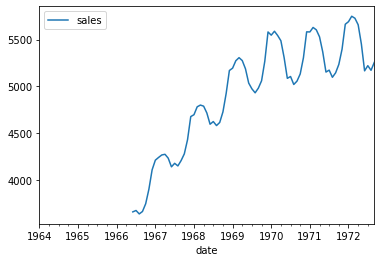

In [153]:
moving_average_champagne.plot()

In [0]:
#testing for stationary
#Dickey-Fuller Test:
from statsmodels.tsa.stattools import adfuller

In [0]:
test_result =adfuller(champagne_df['sales'])
#test_result

In [0]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result =adfuller(sales)
    labels = ['ADF Test statistics','p-value','#Lags used','number of observations used']
    for value,label in zip(result,labels):
        print(label+' : ' +str(value))
    if result[1]<= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [171]:
adfuller_test(champagne_df['sales'])

ADF Test statistics : -1.8335930563276193
p-value : 0.36391577166024686
#Lags used : 11
number of observations used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


we can check stationarity using the following:

Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12,min_periods=0).mean()
    rolstd = timeseries.rolling(12,min_periods=0).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

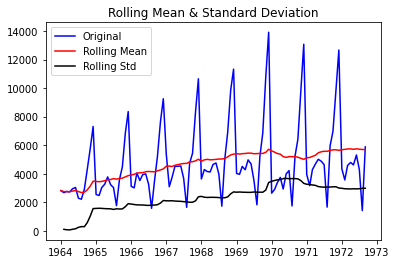

Results of Dickey-Fuller Test:
Test Statistic                 -1.833593
p-value                         0.363916
#Lags Used                     11.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64


In [174]:
test_stationarity(champagne_df['sales'])

**Differencing**

In [0]:
champagne_df['sales first difference'] = champagne_df['sales'] - champagne_df['sales'].shift(1)

In [178]:
champagne_df['sales'].shift(1)

date
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: sales, Length: 105, dtype: float64

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [0]:
champagne_df['Seasonal First Difference']=champagne_df['sales']-champagne_df['sales'].shift(12)

In [181]:
champagne_df.head(20)

,sales,sales first difference,Seasonal First Difference
date,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


In [183]:
adfuller_test(champagne_df['Seasonal First Difference'].dropna())

ADF Test statistics : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags used : 0
number of observations used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


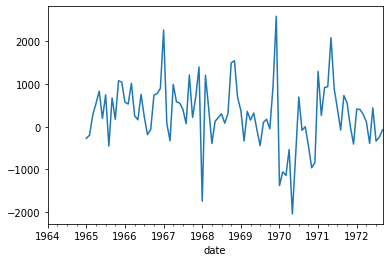

In [184]:
champagne_df['Seasonal First Difference'].plot()


**Auto Regressive Mode**

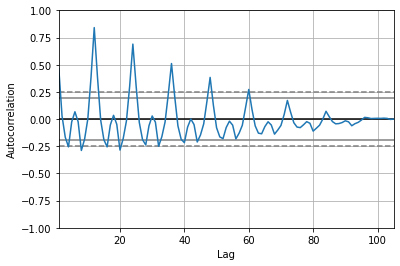

In [196]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(champagne_df['sales'])
plt.show()

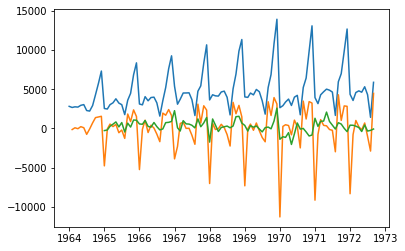

In [198]:
# here we can see trend and seasonality / because those are only reason for data not in a form of stationary
champagne_log = np.log(champagne_df['sales'])
plt.plot(champagne_df)

In [0]:
import math
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

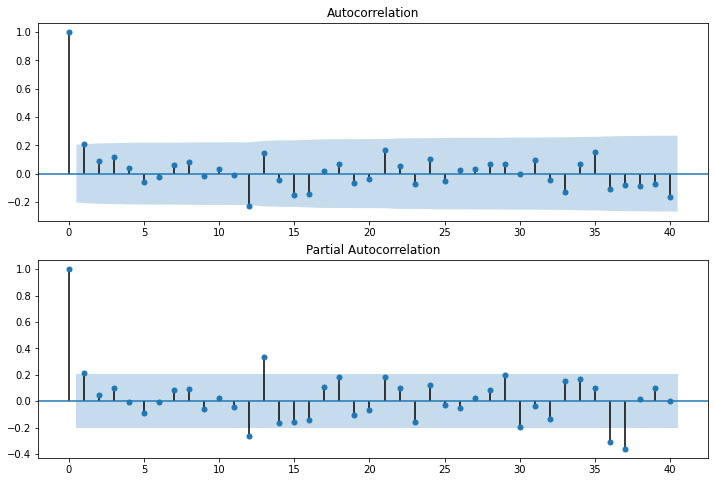

In [203]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(champagne_df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(champagne_df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

***ARIMA***

In [0]:

# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [208]:
model=ARIMA(champagne_df['sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [209]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 07 Apr 2020   AIC                           1910.251
Time:                        18:16:24   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.069      -1.529      47.098
ar.L1.D.sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

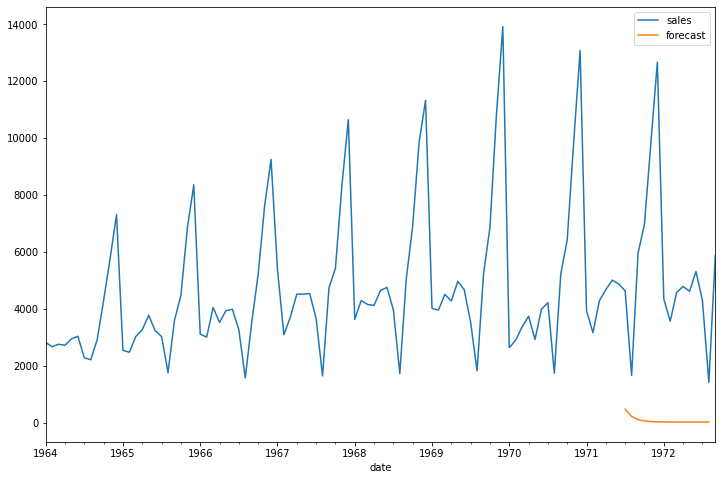

In [211]:
champagne_df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
champagne_df[['sales','forecast']].plot(figsize=(12,8))

**Seasonal ARIMA -SARIMAX**

In [213]:
model=sm.tsa.statespace.SARIMAX(champagne_df['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


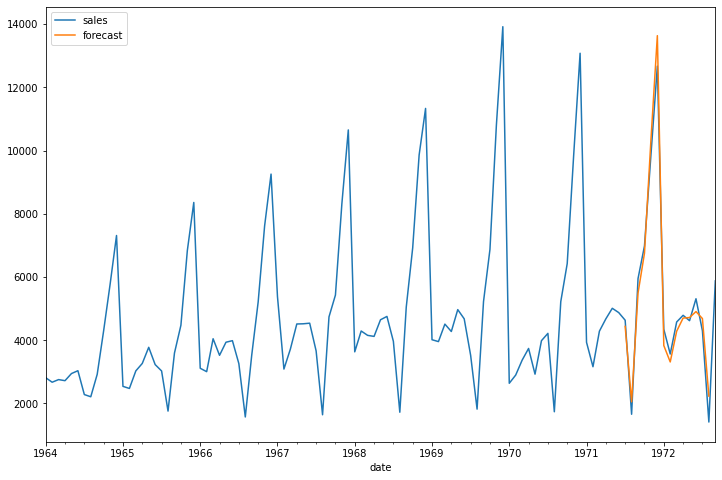

In [214]:

champagne_df['forecast']=results.predict(start=90,end=103,dynamic=True)
champagne_df[['sales','forecast']].plot(figsize=(12,8))

**Predict future sales**

In [0]:
from pandas.tseries.offsets import DateOffset

In [0]:
future_dates = [champagne_df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [0]:

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=champagne_df.columns)

In [222]:
future_datest_df.tail()

,sales,sales first difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [0]:
future_df=pd.concat([champagne_df,future_datest_df])

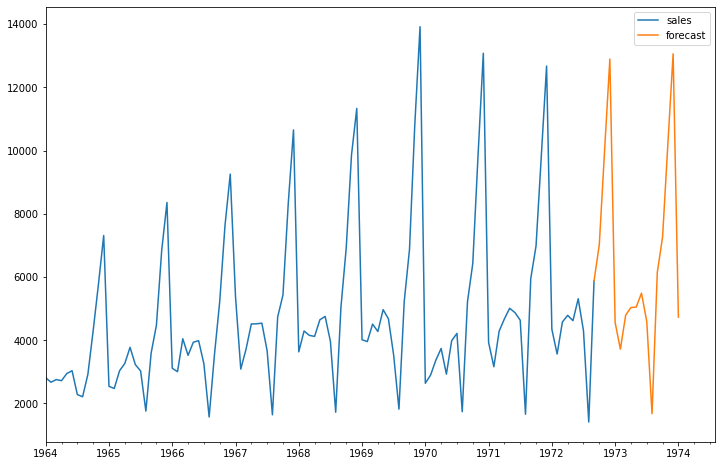

In [225]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['sales', 'forecast']].plot(figsize=(12, 8))